## Stokes flow bounded by a plane wall

In [14]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes
import pyforces

In [15]:
%matplotlib inline
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
p = np.zeros(3*Np)
F = np.zeros(3*Np)
S = np.zeros(5*Np)
D = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

h =3
#initialise
r[0], r[1], r[2]= 0, 0, h   #position
p[0], p[1], p[2]= 0, 0, 1   #orientation
F[0], F[1], F[2]= 0, 0, 1   # force

#stresslet
S0=1
for i in range(Np):
    S[i]      = S0*(p[i]*p[i] -(1.0/3))
    S[i+ Np]  = S0*(p[i + Np]*p[i + Np] -(1.0/3))
    S[i+ 2*Np]  = S0*(p[i]*p[i + Np])
    S[i+ 3*Np] = S0*(p[i]*p[i + 2*Np])
    S[i+ 4*Np] = S0*(p[i + Np]*p[i + 2*Np])
   
D[0], D[1], D[2]= 0, 0, 1

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

array([ 0.,  0.,  3.])

### Stokeslet flow

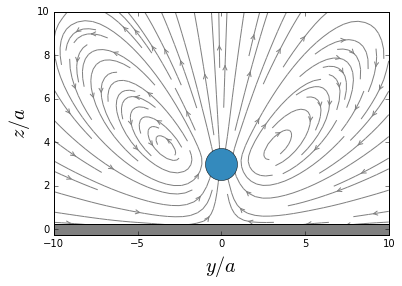

In [16]:
%matplotlib inline
vv=vv*0
wFlow.stokesletV(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[1], r[2], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vy, vz, color="grey", density=1.5, arrowstyle='->', arrowsize =1)
ww=0.25; plt.xlim([-L, L])
plt.ylim([-ww, L])
plt.xlabel(r'$y/a$', fontsize=20)
plt.ylabel(r'$z/a$', fontsize=20)
plt.axhspan(-ww, ww, facecolor='0.5', alpha=1);

## Stresslet Flow

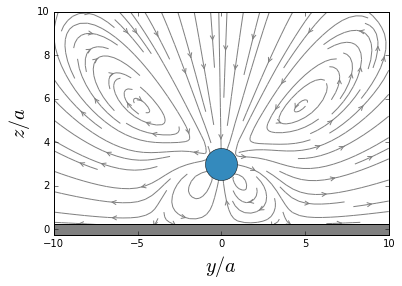

In [17]:
%matplotlib inline
vv=vv*0
wFlow.stressletV(vv, rt, r, S)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)

##Plotting
plt.figure()
plt.plot(r[1], r[2], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vy, vz, color="grey", density=1.5, arrowstyle='->', arrowsize =1)
ww=0.25; plt.xlim([-L, L])
plt.ylim([-ww, L])
plt.xlabel(r'$y/a$', fontsize=20)
plt.ylabel(r'$z/a$', fontsize=20)
plt.axhspan(-ww, ww, facecolor='0.5', alpha=1);

## PD Flow

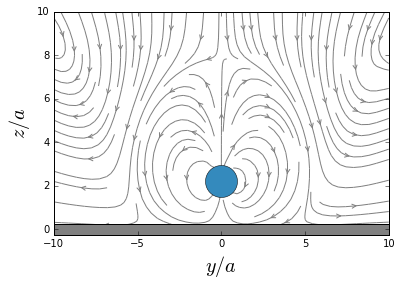

In [18]:
%matplotlib inline
vv=vv*0
r[2]=r[2]-.8
wFlow.potDipoleV(vv, rt, r, D)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)

##Plotting
plt.figure()
plt.plot(r[1], r[2], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vy, vz, color="grey", density=1.5, arrowstyle='->', arrowsize =1)
ww=0.25; plt.xlim([-L, L])
plt.ylim([-ww, L])
plt.xlabel(r'$y/a$', fontsize=20)
plt.ylabel(r'$z/a$', fontsize=20)
plt.axhspan(-ww, ww, facecolor='0.5', alpha=1);